In [1]:
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("/mnt/home/ecunningham/python")
plt.style.use('~/matplotlib.mplstyle')
import gizmo_analysis as ga
import halo_analysis as ra
import numpy as np
from numpy import Inf

In [4]:
sim_directory = "/mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/"


In [5]:
part=ga.io.Read.read_snapshots(['dark'],snapshot_values=385,\
                               simulation_directory=sim_directory)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 385, redshift = 0.488


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/output/snapdir_385/snapshot_385.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 74537000 particles
    dark2     (id = 2): 6750970 particles
    gas       (id = 0): 64162001 particles
    star      (id = 4): 10869964 particles
    blackhole (id = 5): 0 particles

* reading species: ['dark']
* reading particles from:
    snapshot_385.0.hdf5
    snapshot_385.1.hdf5
    snapshot_385.2.hdf5
    snapshot_385.3.hdf5
    snapshot_385.4.hdf5
    snapshot_385.5.hdf5
    snapshot_385.6.hdf5
    snapshot_385.7.hdf5

* reading cosmological parameters from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/initial_condition/ic_agora_m12b.conf

* checking sanity of particle pr

In [9]:
#hal = ra.rockstar_io.IO.read_catalogs(simulation_directory='data/m12i_res7100_md/',snapshot_values=0)

hal = ra.io.IO.read_catalogs(simulation_directory='/mnt/ceph/users/ecunningham/latte/m12b_res7100/',
                    snapshot_value_kind='index',rockstar_directory='halo/rockstar_dm_new/', snapshot_values=385)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/ecunningham/latte/m12b_res7100/snapshot_times.txt

  using snapshot index = 385, redshift = 0.488


# in halo_analysis.halo_io.IO():
! cannot find halo hdf5 files in:  mnt/ceph/users/ecunningham/latte/m12b_res7100/halo/rockstar_dm_new/catalog_hdf5/


OSError: cannot find any halo catalog files of type hdf5 in:  /mnt/ceph/users/ecunningham/latte/m12b_res7100/halo/rockstar_dm_new/

In [5]:
halt = ra.io.IO.read_tree(simulation_directory='/Users/ecunningham/Latte_Sims/m12b_res7100/',
                        rockstar_directory='halo/rockstar_dm_new/')


# in utilities.simulation.Snapshot():
* reading:  Users/ecunningham/Latte_Sims/m12b_res7100/snapshot_times.txt

* read 19882039 halos from:  Users/ecunningham/Latte_Sims/m12b_res7100/halo/rockstar_dm_new/catalog_hdf5/tree.hdf5
  
* assigning star properties to halo merger trees
* read 46261 halos with star particles from:  Users/ecunningham/Latte_Sims/m12b_res7100/halo/rockstar_dm_new/catalog_hdf5/star_385.hdf5
  star.form.time.100
  star.form.time.50
  star.form.time.90
  star.form.time.95
  star.form.time.dif.68
  star.indices
  star.mass
  star.mass.neutral
  star.massfraction
  star.number
  star.position
  star.radius.50
  star.radius.90
  star.vel.circ.50
  star.vel.std
  star.vel.std.50
  star.velocity



In [6]:
#select snapshots and subhalos for which to output particle indices
halt_time = np.where(halt['snapshot']==385)[0] #this is just snap 600 as is, change if necessary
halt_sub = np.where(halt.prop('host.distance.total')<400)[0] #everything within 400 kpc of main halo
halt_notmain = np.where(halt.prop('host.distance.total')>0)[0] #not the main halo


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [9]:
print(halt_time)

[  504500   504501   504502 ... 19879408 19880703 19881863]


In [7]:
#get the full list to pass to the function
subs_tree = np.intersect1d(np.intersect1d(halt_time, halt_sub),halt_notmain)
subs_cat = halt['catalog.index'][subs_tree]

In [8]:
print(np.sum(subs_cat))
print(len(subs_cat))

-21230405533
11091


In [9]:
host_d_total=np.sum(hal['host.distance']**2, axis=1)**(1./2.)
print(len(host_d_total))

46261


(array([ 332., 1255., 1851., 2173., 1841., 1742., 1609., 1085.,  816.,
         571.]),
 array([  6.2601695,  45.63389  ,  85.007614 , 124.38133  , 163.75505  ,
        203.12877  , 242.50249  , 281.87622  , 321.24994  , 360.62366  ,
        399.99738  ], dtype=float32),
 <a list of 10 Patch objects>)

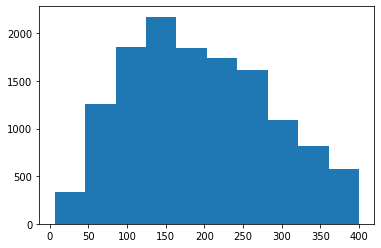

In [10]:
#plt.hist(host_d_total)

selection=(host_d_total>0.)&(host_d_total<400.)
plt.hist(host_d_total[selection])


In [72]:
print(len(hal['host.distance']))
print(len(hal))
print(len(hal['host.distance'][selection]))

46261
67
13275


In [11]:
not_in_main=host_d_total>0.
print(not_in_main.ravel().shape)

(46261,)


In [12]:
print(hal['mass'][~not_in_main])

[1.0526781e+12]


In [52]:
not_in_main2=np.where(host_d_total>0.)[0]

In [79]:
print(np.sum(selection))

13275


In [65]:
hal.info

{'dark.particle.mass': 35181.05413105413,
 'box.length/h': 60000.0,
 'box.length': 85470.08547008547,
 'catalog.kind': 'halo.catalog',
 'file.kind': 'hdf5',
 'baryonic': True,
 'host.number': 1,
 'simulation.name': 'm12b r7100',
 'gas.particle.mass': 7067.275774670917}

In [76]:
hal['dark.indices']

[[],
 [],
 [],
 [],
 array([24357075, 24357083, 24357523, ..., 61840800, 61840801, 61840806],
       dtype=int32),
 [],
 [],
 [],
 array([  351667,   351668,   351669, ..., 63013201, 63013220, 63013241],
       dtype=int32),
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 array([ 2410925,  2411024,  2411026,  2411027,  2411033,  2411034,
         2411036,  2411044,  2412395,  2412396,  2412397,  2412410,
         2412412,  2412512,  2412517,  2412518,  2412519,  2412520,
         2412521,  2412525,  2412526,  2412527,  2412528,  2412529,
         2412530,  2412531,  2412532,  2412533,  2412535,  2412547,
         2412563,  2412564,  2412575,  2412576,  2412577,  2412578,
         2412579,  2412580,  2412581,  2412582,  2412584,  2412585,
         2412586,  2412596,  2412675,  2416211,  2417226,  2417234,
         2417279,  2417280,  2417284,  2417285,  2417288,  2417289,
   

In [23]:
for k in hal.keys():
    print(k)

accrete.rate
accrete.rate.100Myr
accrete.rate.tdyn
am.phantom
am.progenitor.main
axis.b/a
axis.c/a
descendant.snapshot
host.distance
host.index
host.velocity
host.velocity.rad
host.velocity.tan
id
id.to.index
infall.first.mass
infall.first.snapshot
infall.first.vel.circ.max
infall.mass
infall.snapshot
infall.vel.circ.max
major.merger.snapshot
mass
mass.180m
mass.200c
mass.200m
mass.500c
mass.bound
mass.half.snapshot
mass.lowres
mass.peak
mass.peak.snapshot
mass.vir
position
position.offset
progenitor.number
radius
scale.radius
scale.radius.klypin
spin.bullock
spin.peebles
tree.index
vel.circ.max
vel.circ.peak
vel.std
velocity
velocity.offset
dark2.mass
star.form.time.100
star.form.time.50
star.form.time.90
star.form.time.95
star.form.time.dif.68
star.indices
star.mass
star.mass.neutral
star.massfraction
star.number
star.position
star.radius.50
star.radius.90
star.vel.circ.50
star.vel.std
star.vel.std.50
star.velocity
dark.indices
dark.number


In [13]:
#run the assignment
ra.io.Particle.assign_particle_indices(hal, part, 'dark', 
                        lowres_mass_frac_max=1e-6, #contamination from low-resolution particles (shouldn't matter when restricting host distance)
                        mass_limits=[1e9, 8e11], #mass range of subhalos to consider
                        vel_circ_max_limits=[1,Inf], #not used (use halo_velocity_frac_max instead)
                        halo_radius_frac_max=1, #keep particles up to virial radius
                        radius_max=100, #distance from host (taken care of by halo indices)
                        halo_velocity_frac_max=2.0, #keep particles with velocity up to 2vc (i.e. escape velocity)
                        particle_number_fraction_converge=Inf, #turned off
#                        hal_indices=subs_cat #indices of specific halos to assign particles
                        )

* assigning dark particle indices to 45 halos within property limits
 [                                                                      ] (00.0%                                                                      ] (00.0%==                                                                    ] (02.2%===                                                                   ] (04.4%=====                                                                 ] (06.7%======                                                                ] (08.9%========                                                              ] (11.1%=========                                                             ] (13.3%===========                                                           ] (15.6%============                                                          ] (17.8%==============                                                        ] (20.0%================                                                      ]

In [84]:
for k in hal.keys():
    print(k)

accrete.rate
accrete.rate.100Myr
accrete.rate.tdyn
am.phantom
am.progenitor.main
axis.b/a
axis.c/a
descendant.snapshot
host.distance
host.index
host.velocity
host.velocity.rad
host.velocity.tan
id
id.to.index
infall.first.mass
infall.first.snapshot
infall.first.vel.circ.max
infall.mass
infall.snapshot
infall.vel.circ.max
major.merger.snapshot
mass
mass.180m
mass.200c
mass.200m
mass.500c
mass.bound
mass.half.snapshot
mass.lowres
mass.peak
mass.peak.snapshot
mass.vir
position
position.offset
progenitor.number
radius
scale.radius
scale.radius.klypin
spin.bullock
spin.peebles
tree.index
vel.circ.max
vel.circ.peak
vel.std
velocity
velocity.offset
dark2.mass
star.form.time.100
star.form.time.50
star.form.time.90
star.form.time.95
star.form.time.dif.68
star.indices
star.mass
star.mass.neutral
star.massfraction
star.number
star.position
star.radius.50
star.radius.90
star.vel.circ.50
star.vel.std
star.vel.std.50
star.velocity
dark.indices
dark.number


In [14]:
#write out index pointers to .hdf5 file
ra.io.Particle.io_species_hdf5(species='dark', hal=hal, snapshot_index=385, write=True, verbose=True)


# in utilities.basic.io.file_hdf5():
  writing file:  halo/rockstar_dm/catalog_hdf5/dark_385.hdf5
    star.form.time.100 | float32, shape = (46261,)
    star.form.time.50 | float32, shape = (46261,)
    star.form.time.90 | float32, shape = (46261,)
    star.form.time.95 | float32, shape = (46261,)
    star.form.time.dif.68 | float32, shape = (46261,)
    star.indices | object, shape = (46261,)
    star.mass | float32, shape = (46261,)
    star.mass.neutral | float32, shape = (46261,)
    star.massfraction | float64, shape = (46261, 15)
    star.number | int32, shape = (46261,)
    star.position | float32, shape = (46261, 3)
    star.radius.50 | float32, shape = (46261,)
    star.radius.90 | float32, shape = (46261,)
    star.vel.circ.50 | float32, shape = (46261,)
    star.vel.std | float32, shape = (46261,)
    star.vel.std.50 | float32, shape = (46261,)
    star.velocity | float32, shape = (46261, 3)
    dark2.mass | float32, shape = (46261,)
    id | int32, shape = (46261,)
    inf

In [87]:
print(hal['dark.indices'])

[list([]) list([]) list([]) ... list([]) list([]) list([])]


In [86]:
np.save('m12b_385_dark_indices.npy', hal['dark.indices'])

In [15]:
parts_in_halos = np.unique(np.hstack(hal['dark.indices']).astype('int64'))
print(parts_in_halos.dtype)

int64


In [16]:
ga.io.Read.assign_host_orbits(part)


# in utilities.particle.parse_species():
! star not in particle catalog
! gas not in particle catalog
* assigning orbital properties wrt galaxy/halo to ['dark']


In [17]:
from matplotlib.colors import LogNorm


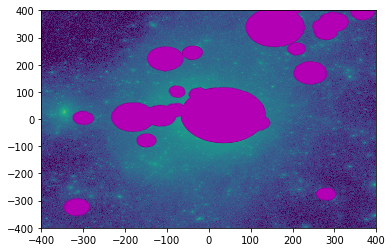

In [18]:
plt.hist2d(part['dark']['host.distance'][:,0],part['dark']['host.distance'][:,1],
          bins=[np.linspace(-400,400,800),np.linspace(-400,400,800)],
            norm=LogNorm());
plt.plot(part['dark']['host.distance'][parts_in_halos,0],part['dark']['host.distance'][parts_in_halos,1],\
         '.m',ms=1,alpha=0.1)

In [19]:
not_in_subs=np.setdiff1d(range(len(part['dark']['mass'])),parts_in_halos);

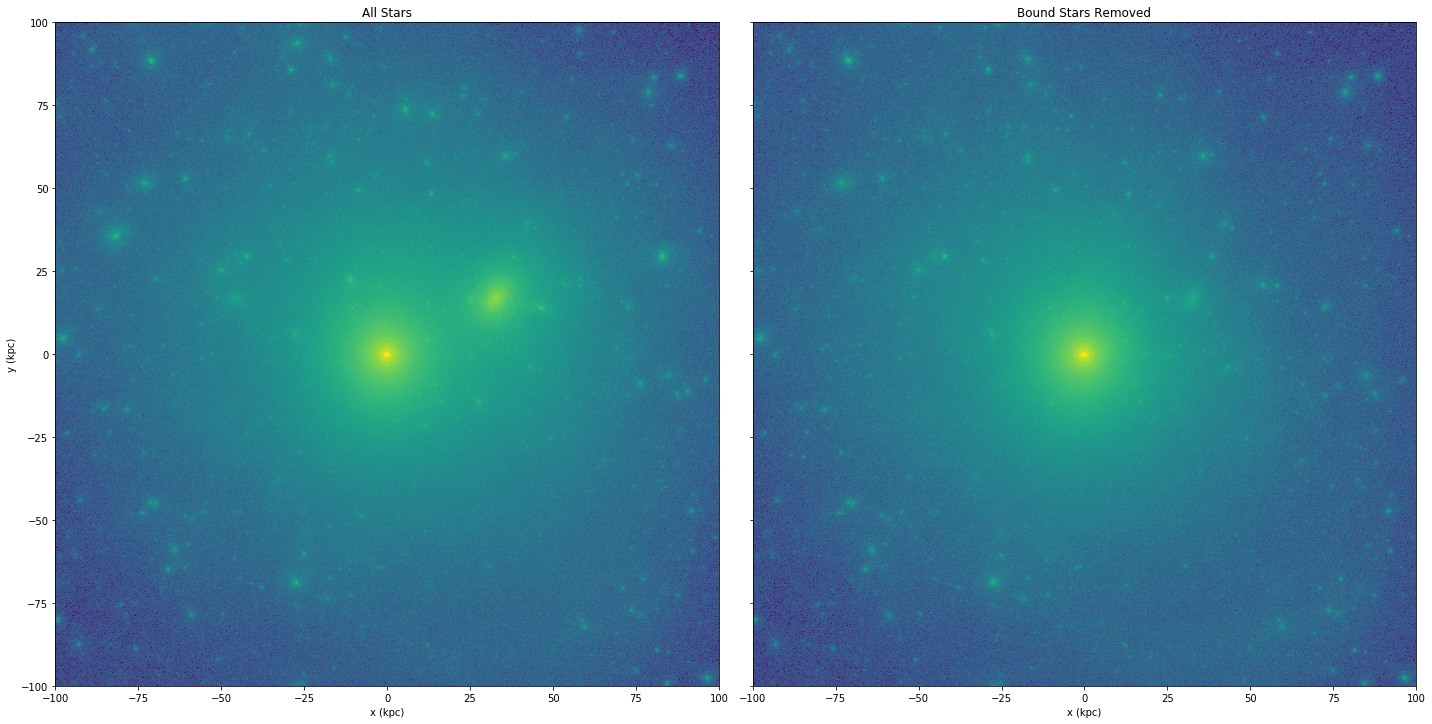

In [20]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10),sharey=True)

ax[0].hist2d(part['dark']['host.distance'][:,0],part['dark']['host.distance'][:,1],
          bins=np.linspace(-100,100,800),
            norm=LogNorm());
ax[0].set_title('All Stars')
#ax[0].text(380,-380,'All stars',bbox=dict(facecolor='white', alpha=0.8),ha='right',va='bottom')

ax[1].hist2d(part['dark']['host.distance'][not_in_subs,0],part['dark']['host.distance'][not_in_subs,1],
          bins=np.linspace(-100,100,800),
            norm=LogNorm());
ax[1].set_title('Bound Stars Removed')
#ax[1].text(380,-380,'Stars not in bound satellites',bbox=dict(facecolor='white', alpha=0.8),ha='right',va='bottom')


for a in ax:
    a.set_aspect('equal')
    a.set_xlabel('x (kpc)')
    
ax[0].set_ylabel('y (kpc)')

fig.tight_layout()


In [21]:
np.savetxt('m12b_385_unbound_dark_indices.txt',not_in_subs,fmt='%d')

In [22]:
print(len(not_in_subs))

63360193
